# Plots for Paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

import Materials_Parameters as mp
from Pairing_Projection import Change_Basis, Spin_Symmetry, Momentum_Symmetry, Frequency_Symmetry
from MTI_Analytical import parameters, FMTI2_SemiInfinite
from MTI_Discretization import eigenstates_Dirichlet as eigenstates, eigenstates_Neumann


# The parameters are taken from Ref[4] in Edi's paper. 
# Mind that the Hamiltonian is defined differently and hence the sign of M0 is flipped
# Furthermore, we neglect asymmetry (D1=0) and Dirac point energy (C0=0)

# bismuth selenide [3]
Bi2Se3_3 = dict(C0 = 0., D1 = 0., A1 = 2.2, M0 = 0.28, B1 = 10)
# bismuth selenide [4]
Bi2Se3_4 = dict(C0 = 0., D1 = 0., A1 = 2.26, M0 = 0.28, B1 = 6.86)
# bismuth selenide [5]
Bi2Se3_5 = dict(C0 = 0., D1 = 0., A1 = 1.83, M0 = 0.17, B1 = 3.35)
# bismuth selenide fit
Bi2Se3_fit = dict(C0 = 0., D1 = 0., A1 = 1.94, M0 = 0.30, B1 = 6.)

# bismuth telluride [4]
Bi2Te3_4 = dict(C0 = 0., D1 = 0., A1 = 0.3, M0 = 0.3, B1 = 2.79)
# bismuth telluride [5]
Bi2Te3_5 = dict(C0 = 0., D1 = 0., A1 = 0.9, M0 = 0.3, B1 = 9.25)
# bismuth telluride fit
Bi2Te3_fit = dict(C0 = 0., D1 = 0., A1 = 0.55, M0 = 0.26, B1 = 4.62)

# antimony telluride [4]
Sb2Te3_4 = dict(C0 = 0., D1 = 0., A1 = 0.84, M0 = 0.22, B1 = 19.64)
# antimony telluride [5]
Sb2Te3_5 = dict(C0 = 0., D1 = 0., A1 = 1.17, M0 = 0.18, B1 = 22.12)
# antimony telluride fit
Sb2Te3_fit = dict(C0 = 0., D1 = 0., A1 = 1.69, M0 = 0.21, B1 = 19.32)

In [2]:
plt.style.use(['default', './paper.mplstyle'])

## **Energy Spectrum**

In [3]:
# fitted parameters for bismuth selenide
par = mp.Bi2Se3_fit; print(par)
# lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx = 0., ky = 0., L = 0.010, **par, C=0., D1=0., D2=0.)

{'A2': 4.33, 'A1': 1.94, 'M': 0.3, 'B1': 6.0, 'B2': 70.38}


#### **Discretized Energies**

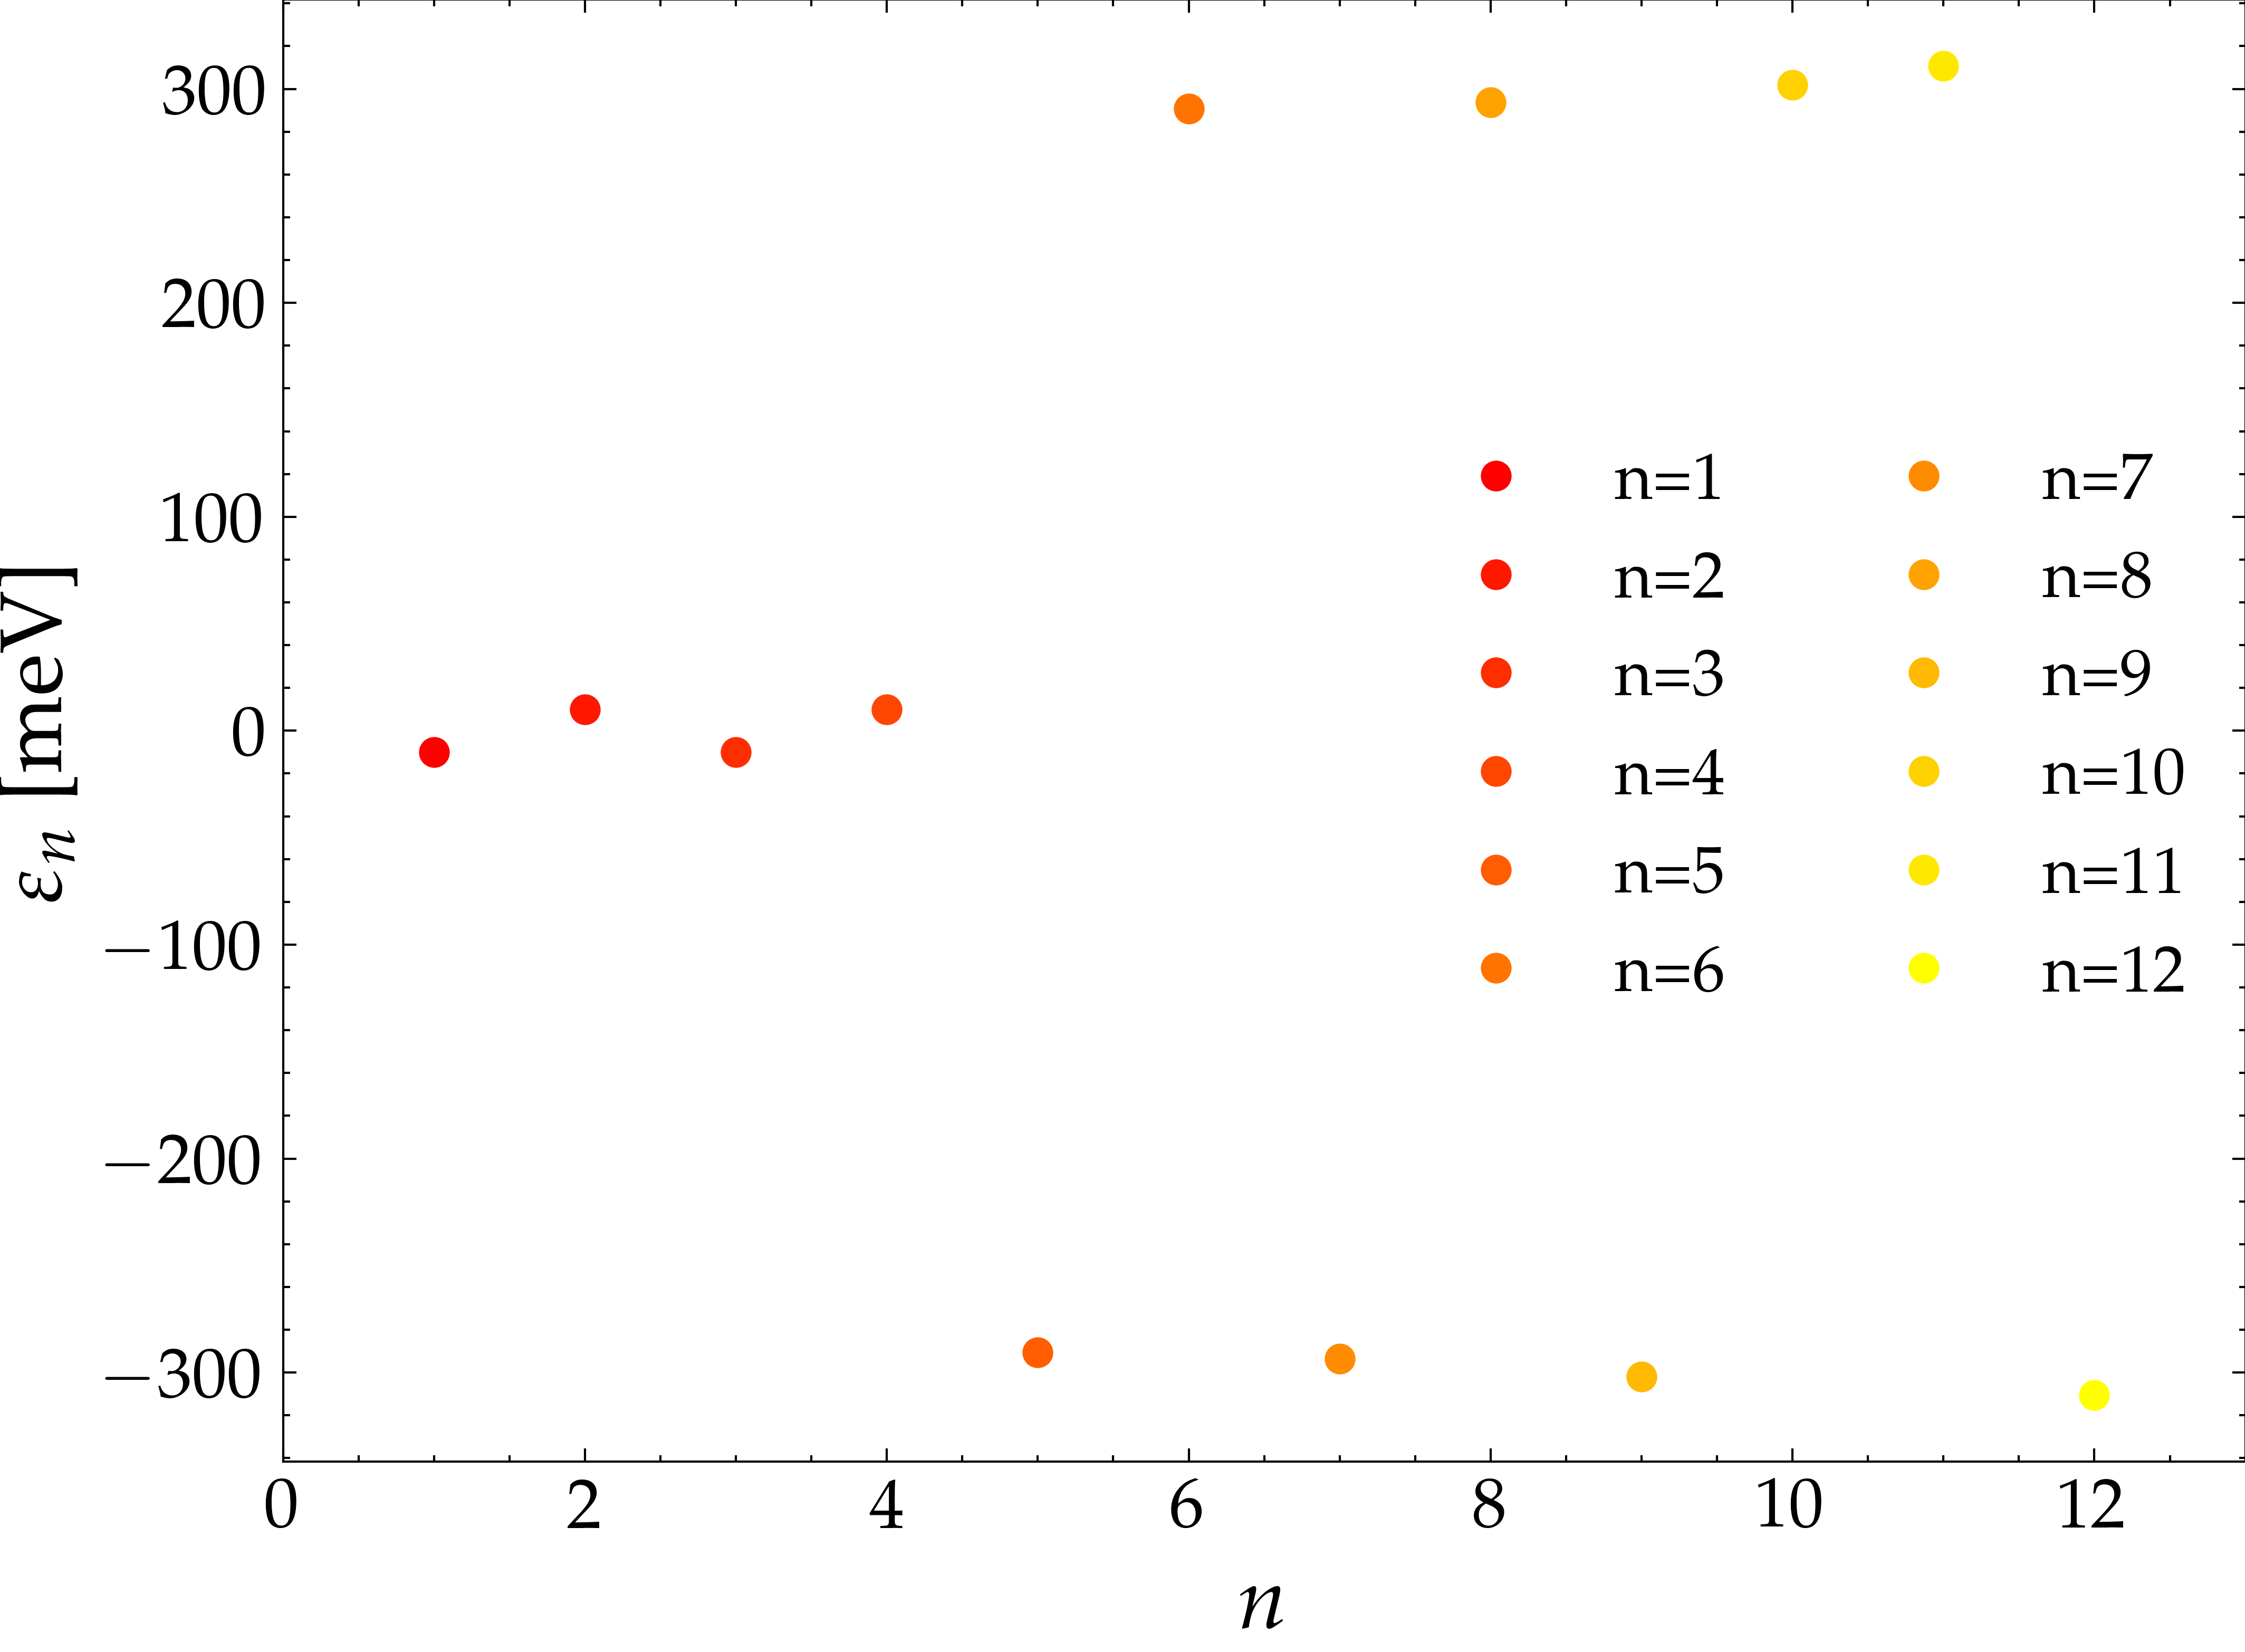

In [4]:
# eigenvalues to plot
n = 12
# colors
cmap = plt.get_cmap('autumn', n)
# figure
fig, ax = plt.subplots(1,1, figsize=(8, 6))

# energies 
#print('Energy eigenvalues: ' + str(egval[0:n]) + '\n')

# loop over eigenvalues
for iegv in range(n):

    # plot energy
    ax.plot(iegv+1, 1000*egval[iegv], 'o', label='n=' + str(iegv+1), c=cmap(iegv));

ax.legend(fontsize=15, ncol=2, loc='center right')
ax.set_xlim(0, n+1)
ax.set_xlabel('$n$', fontsize = 20)
ax.set_ylabel('$\\varepsilon_n$ [meV]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

#fig.savefig('Paper/energies.pdf', bbox_inches='tight', pad_inches=0.1)
#fig.savefig('Paper/energies.svg', bbox_inches='tight', pad_inches=0.1)

#### **Probability Density**

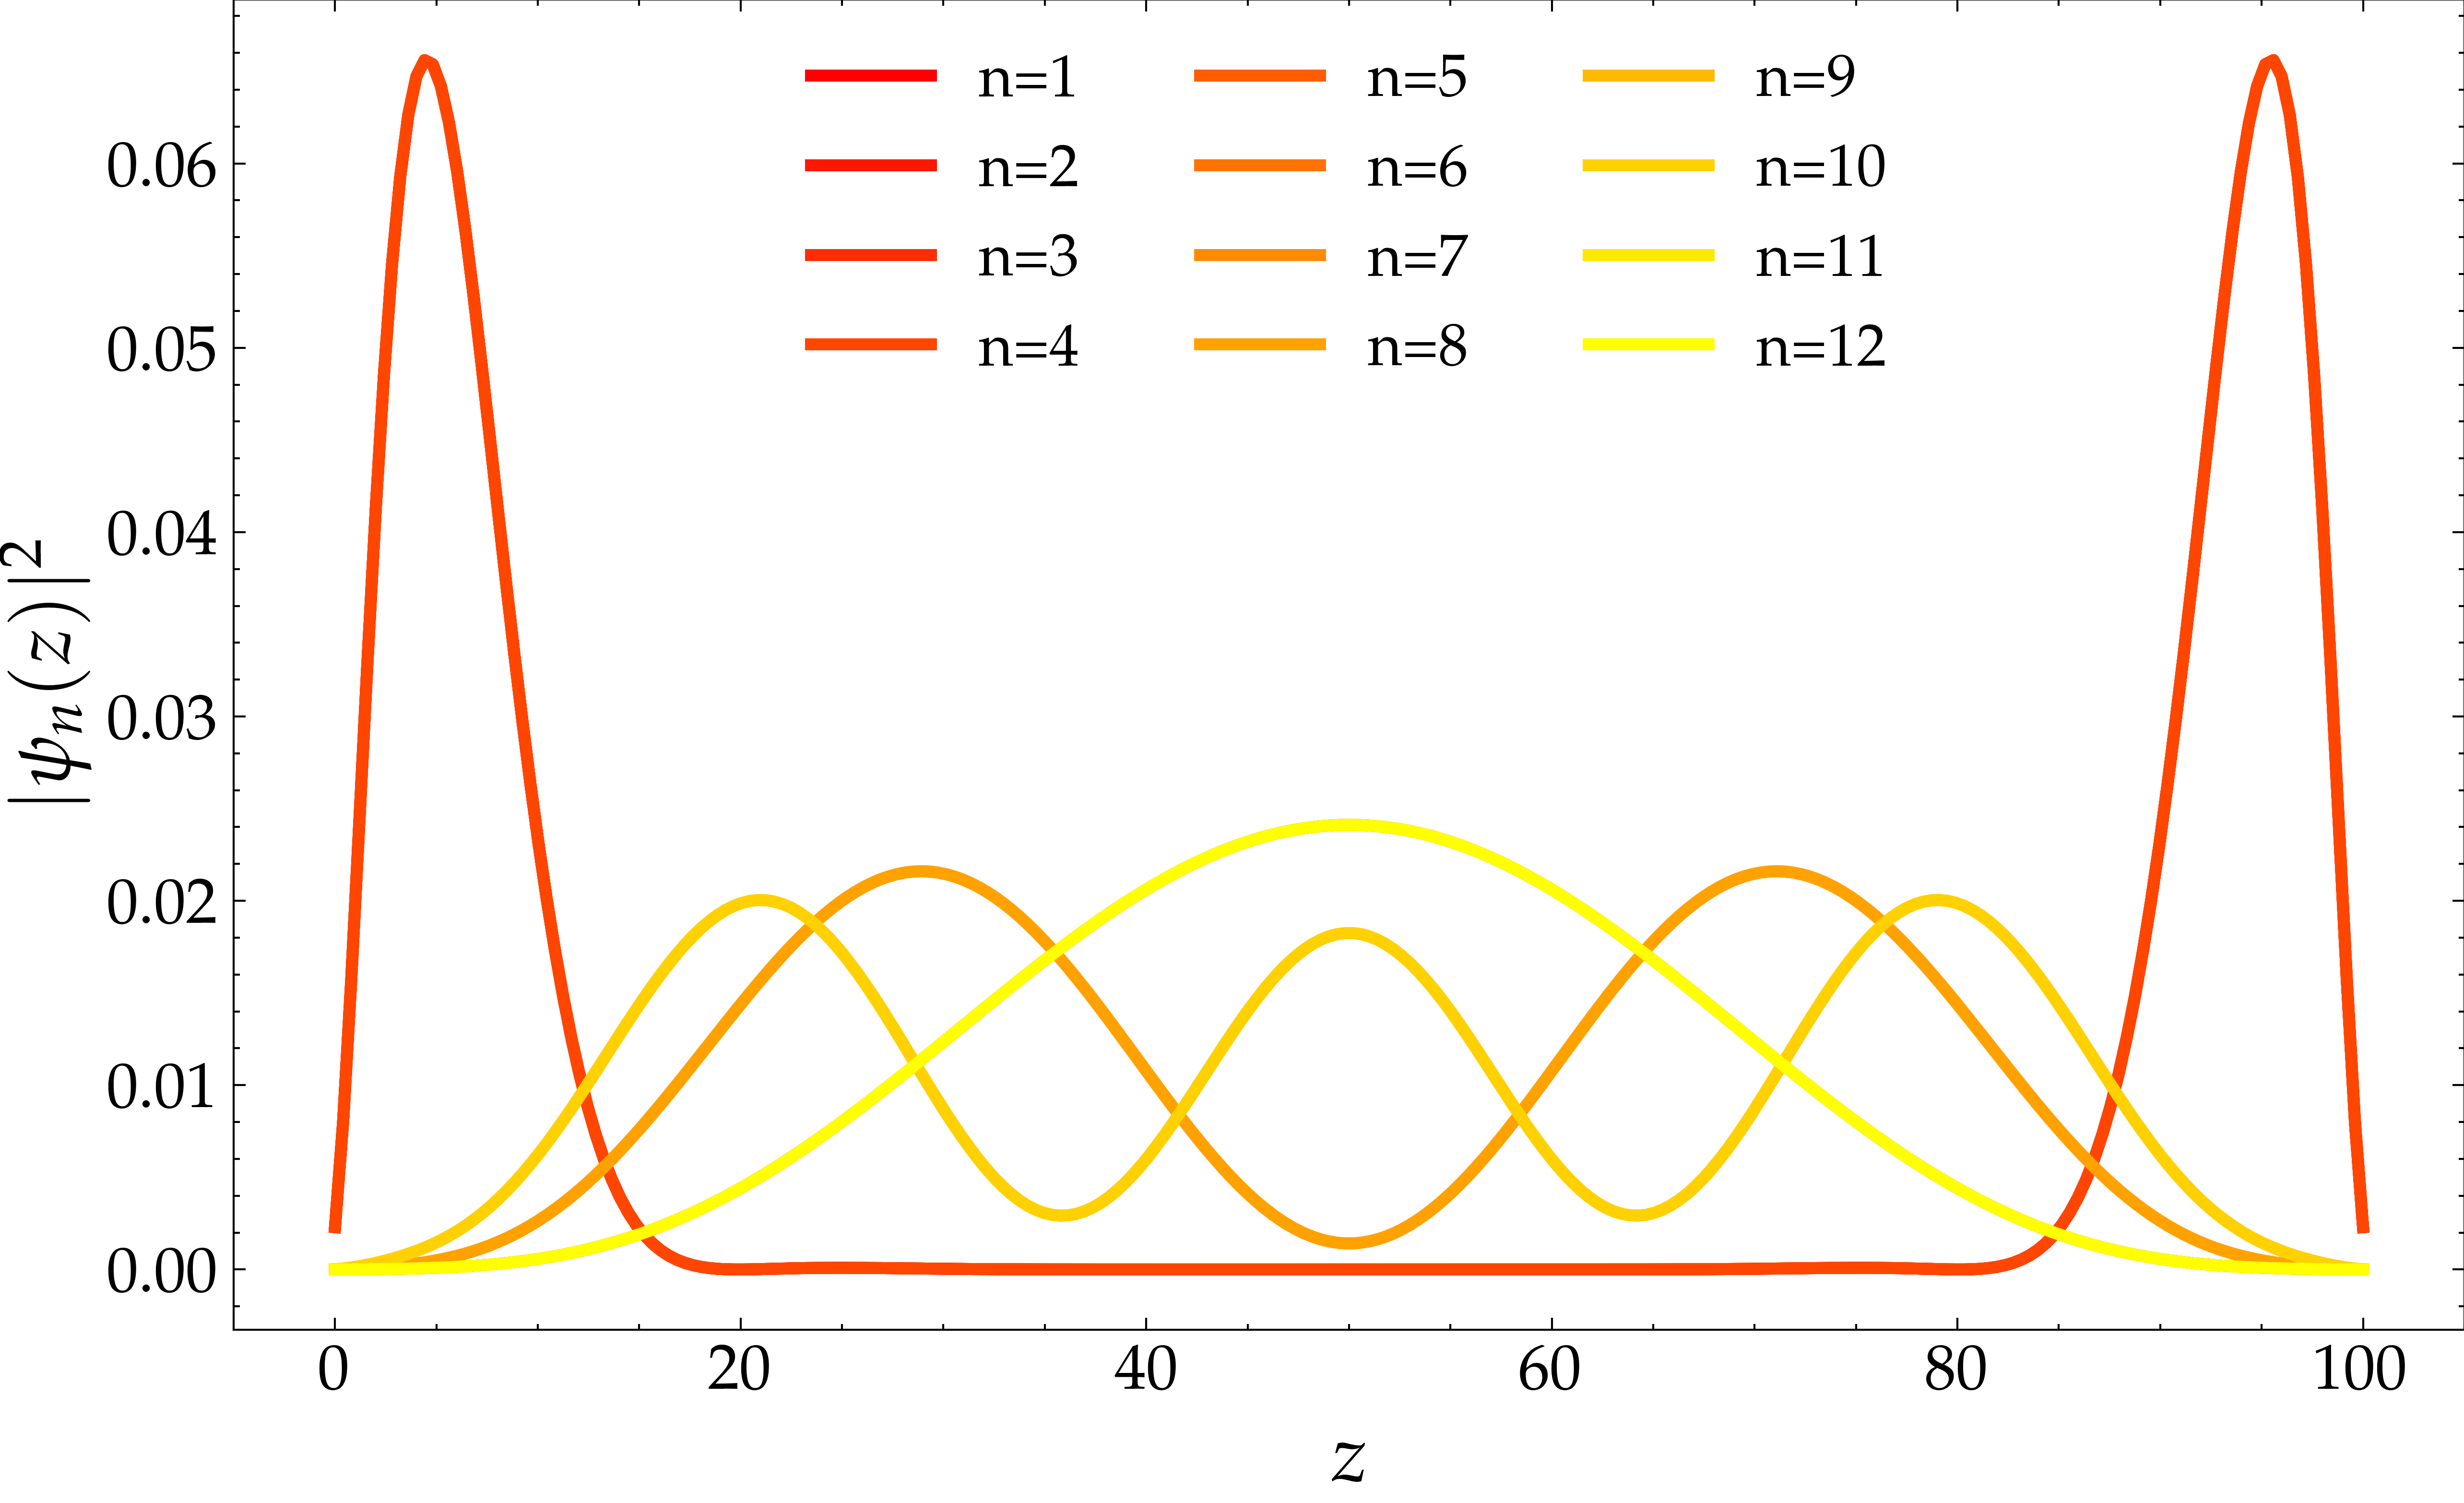

In [5]:
# figure
fig, ax = plt.subplots(1,1, figsize=(10, 6))

# loop over eigenvalues
for iegv in range(n):

    # probability density for each lattice point
    probdens = np.array([np.vdot(s, s) for s in spinors[iegv]]).real

    # plot probability density
    ax.plot(lattice, probdens, label='n=' + str(iegv+1), lw=3, c=cmap(iegv))

    #ax.axvline(x=10, color='black', ls=':')
 
    # normalization
    #print(iegv, np.trapz(probdens, x=lattice))


ax.legend(fontsize=15, loc='upper center', ncol=3)
ax.set_xlabel('$z$', fontsize = 20)
ax.set_ylabel('$|\psi_n(z)|^2$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

#fig.savefig('Paper/probability_density.pdf', bbox_inches='tight', pad_inches=0.1)
#fig.savefig('Paper/probability_density.svg', bbox_inches='tight', pad_inches=0.1)

## **Real Space Pairing**

In [14]:
# finite z-lattice
d = 100.; lattice = np.linspace(0., 35, 250)
# parameters
mu = 0.010; Delta = 0.005; L = 0.010; omega = 0.0025
# coupling matrices
Gamma = np.matrix([[1,0],[1,0],[0,1],[0,1]])

# compute pairing in real space
F2 = np.array([FMTI2_SemiInfinite(d=d, z=z, Z=z, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, C=0., D1=0., A1=1.94, M=0.30, B1=6.) for z in lattice])

# finite z-lattice
d = 100.; Nlat = 250; dZ = d/(Nlat-1)
# discretized eigenstates
lattice_eig, egval, spinors = eigenstates_Neumann(Nlat=Nlat, dZ=dZ, kx=0., ky=0., L=L, **par, C=0., D1=0., D2=0.)

# get decay length for electron and hole
lup, l2, g1, g2 = parameters(spin='up', L=L, omega=omega,  **Bi2Se3_fit)
ldw, l2, g1, g2 = parameters(spin='down', L=L, omega=omega, **Bi2Se3_fit)

# evaluate pairing decay length 
xi = 1./(lup.real + ldw.real); print('decay length = ' + str(xi))

# normalize with valuee at the interface
f0 = np.linalg.norm(F2[0])
# evaluate exponential decay 
expo = np.array([np.exp(-z/xi) for z in lattice])

decay length = 3.093657339845071


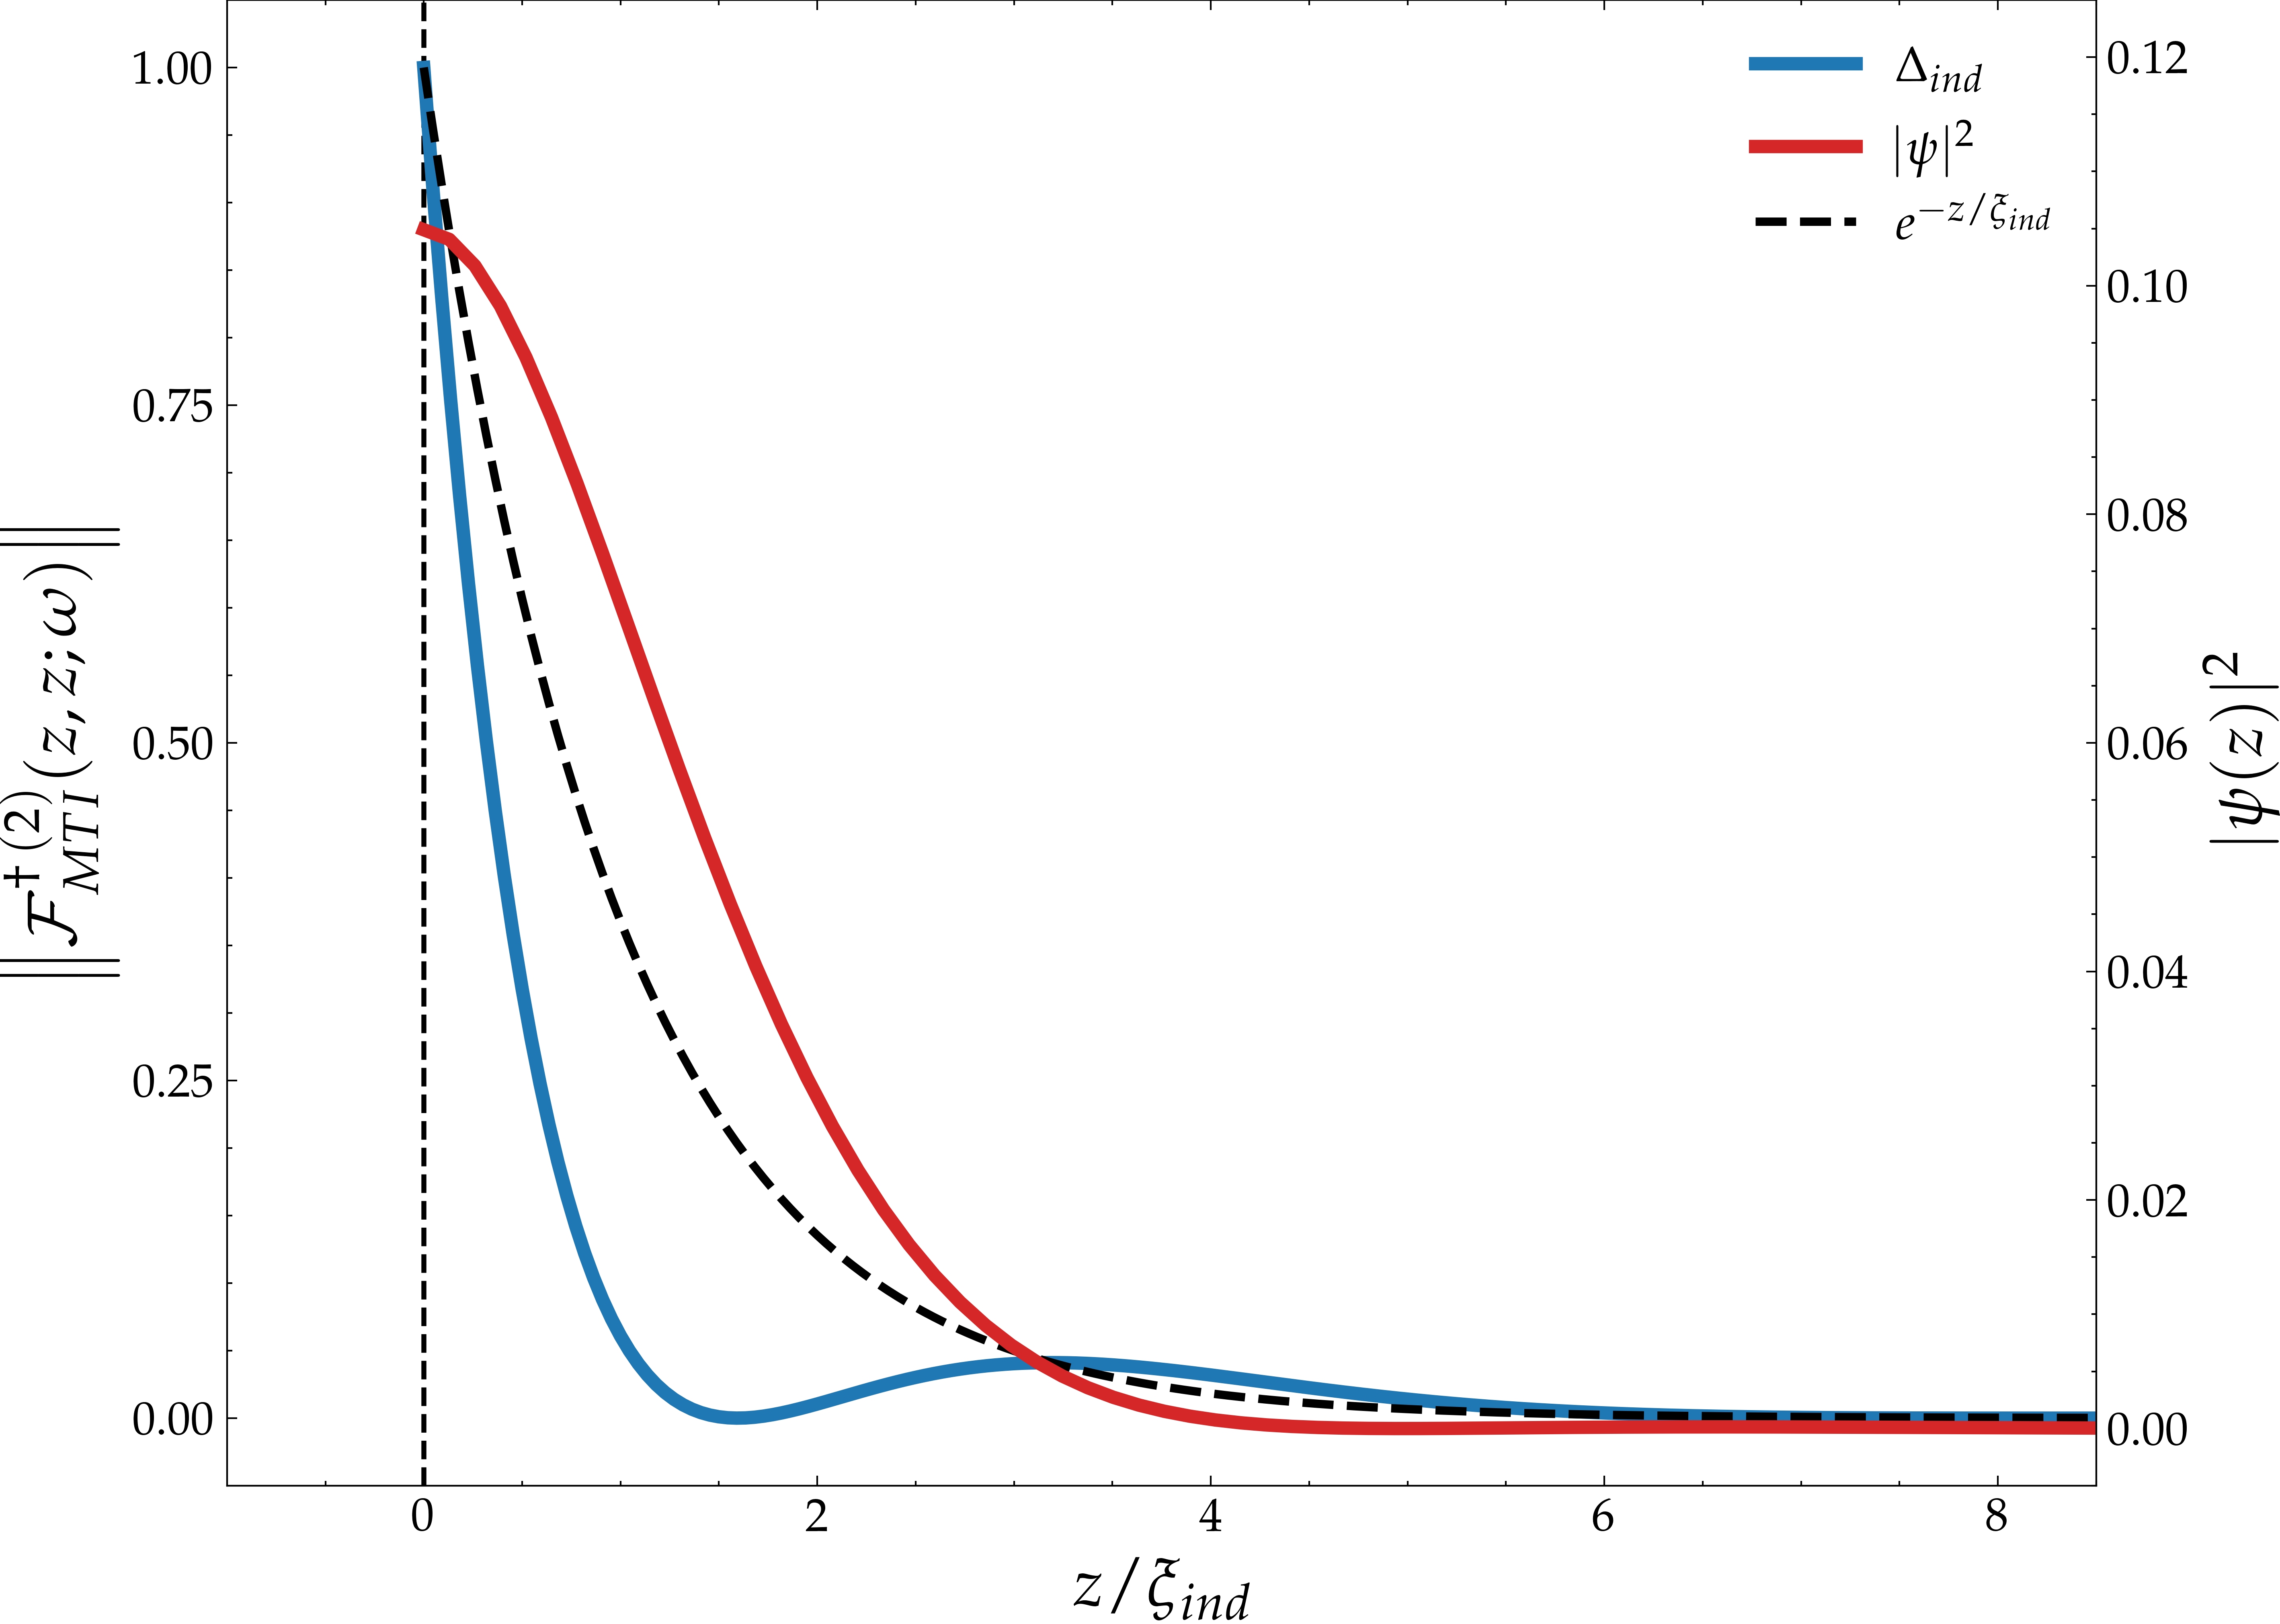

In [7]:
# colors for plotting
blue = '#1f77b4'; red = '#d62728'
# subplots
fig, ax = plt.subplots(1,1, figsize=(10,8))

# compute probability density for each lattice point
probdens = np.array([np.vdot(s, s) for s in spinors[0]]).real

# line at the MTI-SC interface
ax.axvline(x=0, c='black', ls='dashed', lw=1.5)


# plot norm of pairing
ax.plot(lattice/xi, [np.linalg.norm(f)/f0 for f in F2], lw=4, ls='-', c=blue, label='$\Delta_{ind}$')

# plot probability density
ax_twin = ax.twinx() 
ax_twin.plot(lattice_eig/xi, probdens, lw=4, ls='-', c=red)
ax_twin.set_ylim(bottom=-0.005, top=0.1)
ax_twin.tick_params(axis='both', which='major', labelsize=14)

# set labels
ax.set_xlabel("$z / \\xi_{ind}$", fontsize = 20)
ax.set_ylabel("$\left\lVert \mathcal{F}_{MTI}^{\dagger \, (2)} (z,z;\omega) \\right \\rVert$", fontsize = 20)
ax_twin.set_ylabel("$|\psi(z)|^2$", fontsize = 20)

# set limits
ax.set_ylim(ax.get_ylim())
ax.set_yticks([0., 0.25, 0.5, 0.75, 1.])

ax.set_xlim(-1, 8.5)
ax_twin.set_ylim(ax_twin.get_ylim()[0], 0.125)

# fake line for legend
ax.plot(np.linspace(-100,-200,10), np.linspace(-100,-200,10), lw=4, ls='-', c=red, label='$|\psi|^2$')

# plot the exponential function
ax.plot(lattice/xi, expo, lw=2.5, ls='--', label='$e^{-z/\\xi_{ind}}$', c='black')

ax.tick_params(axis='both', which='major', labelsize=14)        
ax.legend(fontsize=15);

#fig.savefig('Paper/F2_real_space.pdf', bbox_inches='tight', pad_inches=0.1)
#fig.savefig('Paper/F2_real_space.svg', bbox_inches='tight', pad_inches=0.1)

## **Decay Lenght**

In [8]:
energy = 0.
Zeeman = np.linspace(-0.050, 0.050, 201)

xi = []
# loop over materials parameters
for params in [Bi2Se3_fit, Bi2Te3_fit, Sb2Te3_fit]:

      #print(params)

    lambdaup = []; lambdadw = []; 
    # loop over Zeeman
    for L in Zeeman:
    
        # spin up
        l1,l2,g1,g2 = parameters(spin='up', L=L, omega=energy, **params)
        # append to lists
        lambdaup.append(l1.real)
        
        # spin down
        l1,l2,g1,g2 = parameters(spin='down', L=L, omega=energy, **params)
        # append to lists
        lambdadw.append(l1.real)
        
    lambdaup = np.array(lambdaup)
    lambdadw = np.array(lambdadw)

    xi.append( np.divide(1., lambdaup+lambdadw) )

xi = np.array(xi)

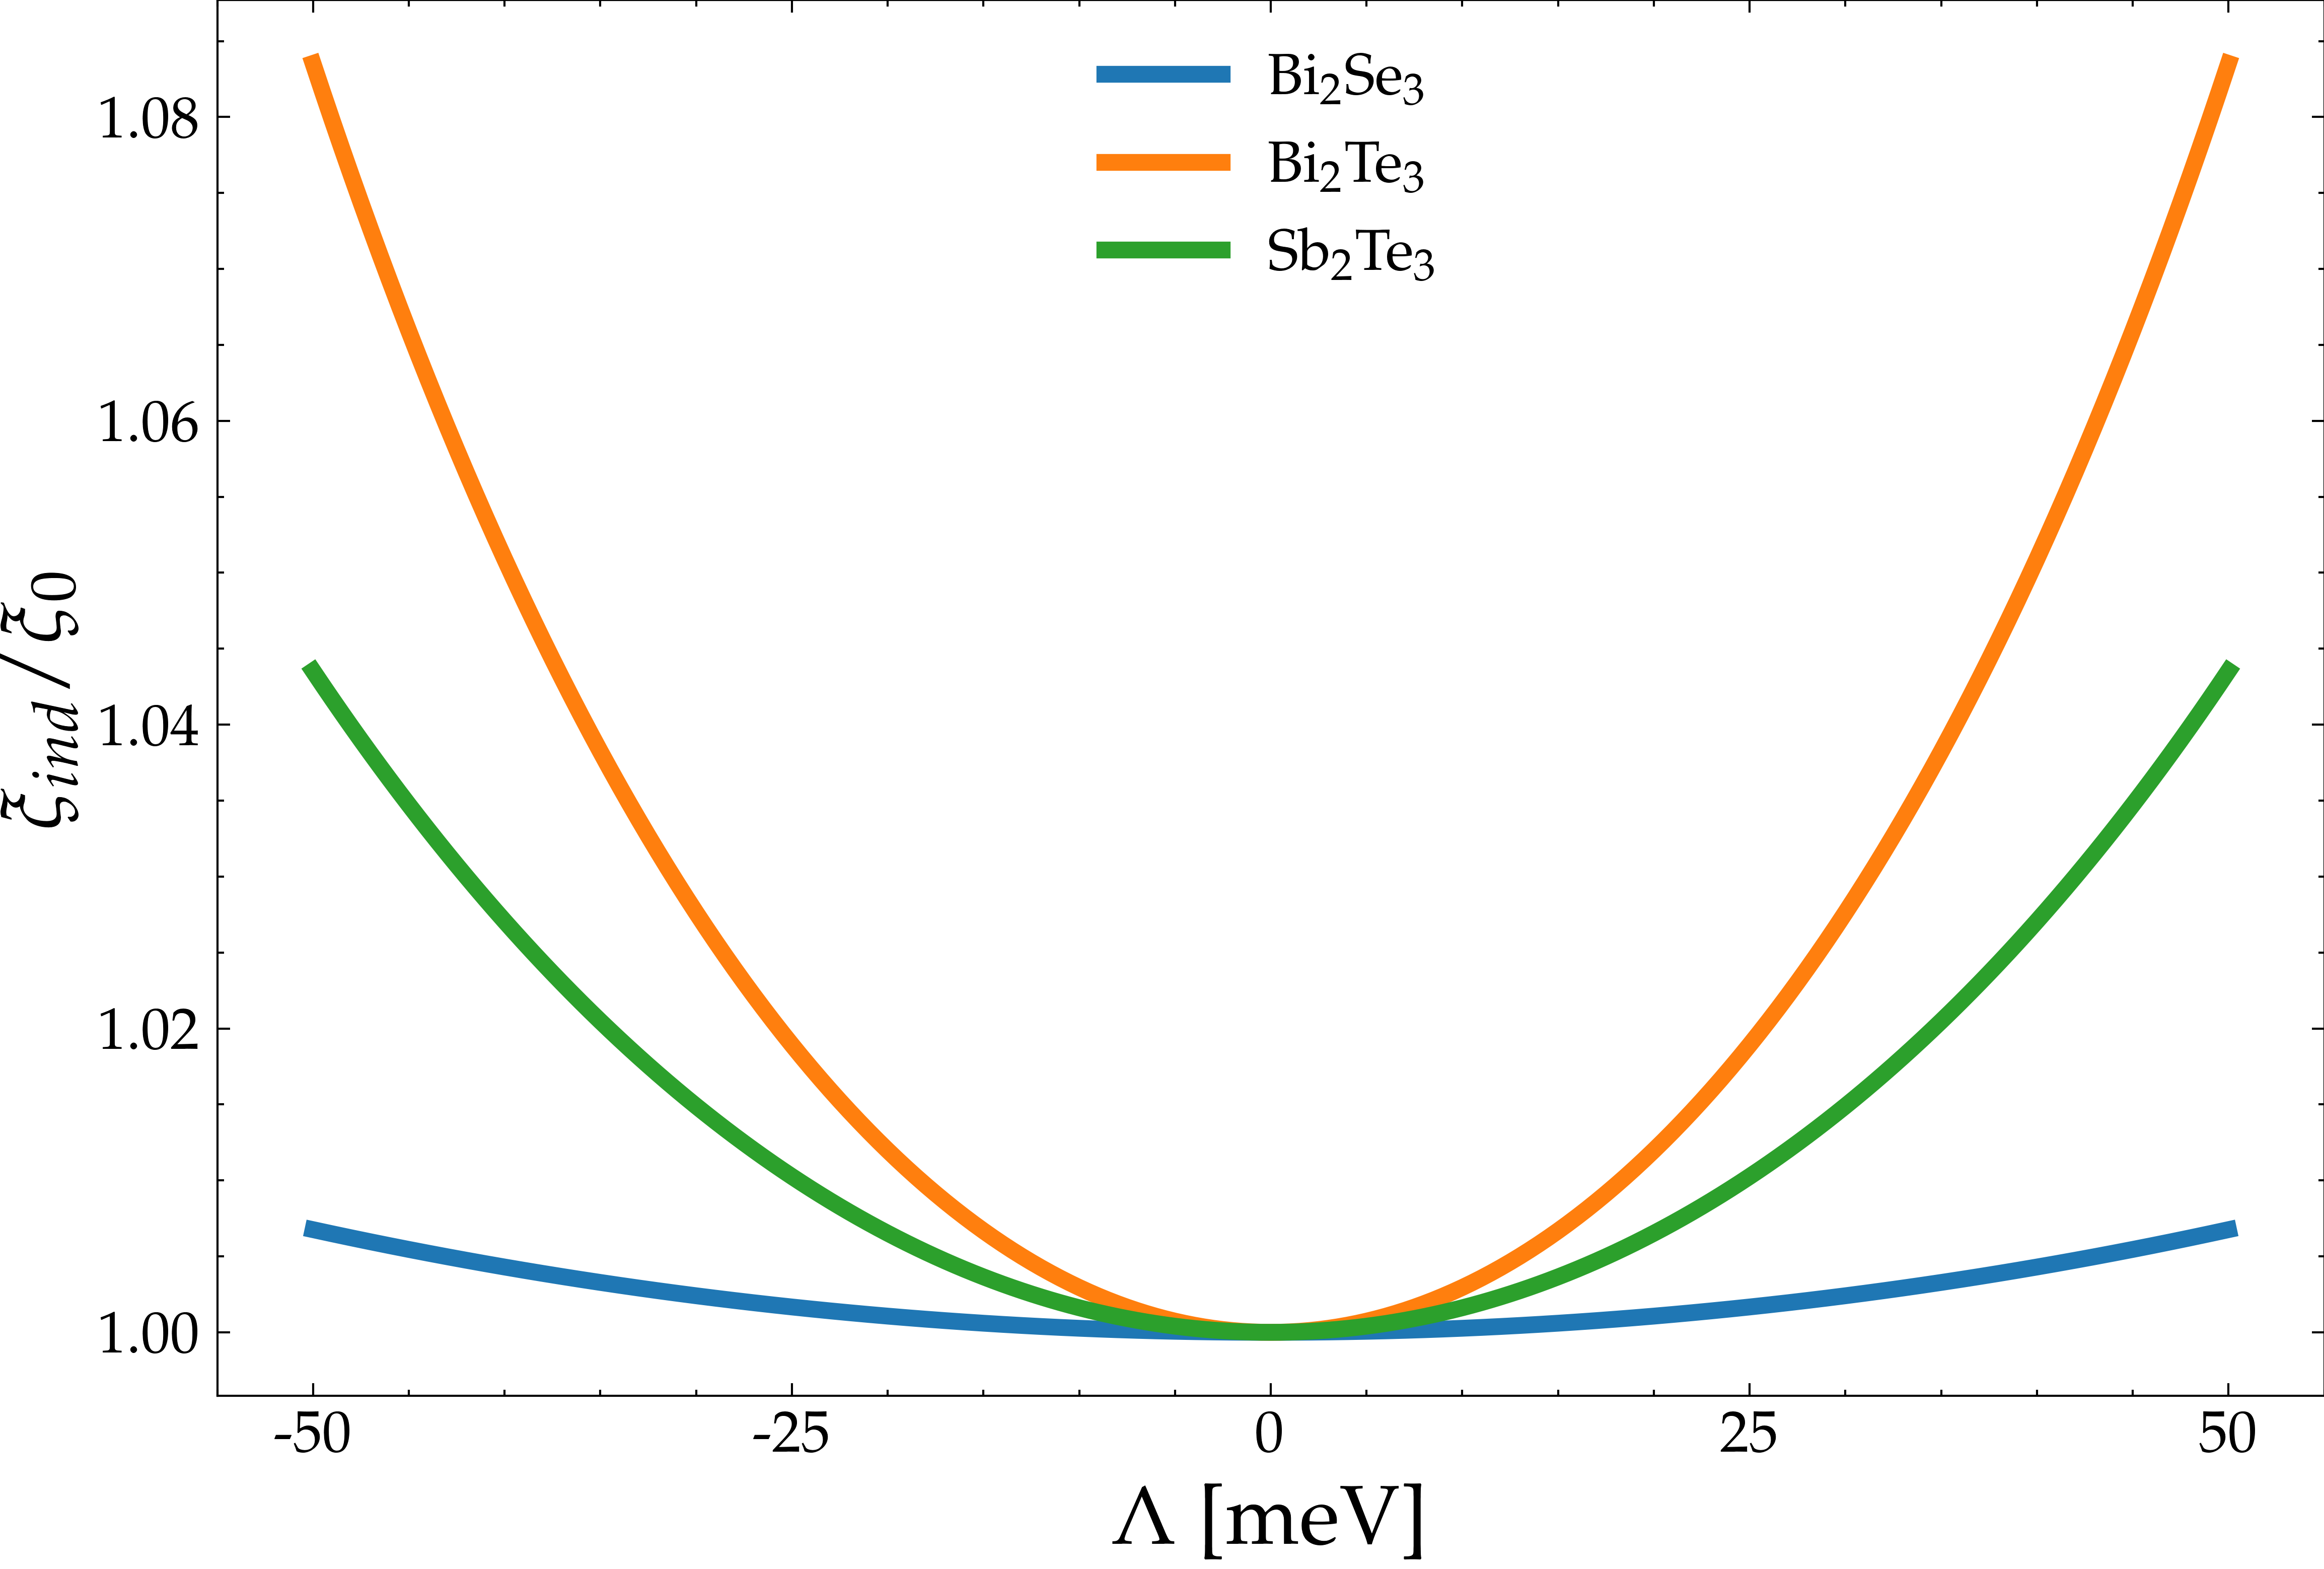

In [9]:
# figure
fig, ax = plt.subplots(1,1, figsize=(9, 6))

# labels for materials 
materials = ['$\mathrm{Bi}_2 \mathrm{Se}_3$', '$\mathrm{Bi}_2 \mathrm{Te}_3$', '$\mathrm{Sb}_2 \mathrm{Te}_3$']

for idx in range(len(xi)):
    
    # normalize with L=0 value
    xi_0 = xi[idx][100]
    
    # plot normalized decay lenght
    ax.plot(Zeeman, xi[idx]/xi_0, lw=4, label=materials[idx], ls='-')


ax.set_xticks([-0.050, -0.025, 0, 0.025, 0.050])
ax.set_xticklabels(['-50', '-25', '0', '25', '50'])
ax.set_xlabel("$\Lambda$ [meV]", fontsize = 20)
ax.set_ylabel("$\\xi_{ind} / \\xi_0$", fontsize = 20)

        
ax.tick_params(axis='both', which='major', labelsize=14)        
ax.legend(fontsize=14);

#fig.savefig('Paper/decay_length.pdf', bbox_inches='tight', pad_inches=0.1)
#fig.savefig('Paper/decay_length.svg', bbox_inches='tight', pad_inches=0.1)

## **Pairing Symmetry**

#### **Spin Symmetry**

In [110]:
# fitted parameters for bismuth selenide
par = mp.Bi2Se3_fit

# parameters
d=100.; mu = 0.010; Delta = 0.005; omega = 0.0025; k = 0.005; kx = 0.005; ky = 0.005
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])
# Zeeman values 
Zeeman = np.linspace(0., 0.050, 100)


# get decay length for electron and hole
lup, l2, g1, g2 = parameters(spin='up', L=L, omega=omega,  **Bi2Se3_fit)
ldw, l2, g1, g2 = parameters(spin='down', L=L, omega=omega, **Bi2Se3_fit)

# evaluate pairing decay length 
xi = 1./(lup.real + ldw.real); print('decay length = ' + str(xi))


# array for singlet/triplet ratio
Ns = []; Nt = []
# center of mass positions
CM = xi * np.array([0.5, 1, 2, 3])
# loop over values of Z0
for Z0 in CM:

    print('Center of mass = ' + str(Z0))

    # evaluate singlet/triplet components
    spin = np.array([Spin_Symmetry(d=d, Z0=Z0, k=k, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19, **par, C=0, D1=0, D2=0) for L in Zeeman])
    # get singlet part
    Ns.append( np.divide( spin[:,0], spin[:,0]+spin[:,1] ) )
    # get triplet part
    Nt.append( np.divide( spin[:,1], spin[:,0]+spin[:,1] ) )

Ns = np.array(Ns)
Nt = np.array(Nt)

decay length = 3.093657339845071
Center of mass = 1.5468286699225355
Center of mass = 3.093657339845071
Center of mass = 6.187314679690142
Center of mass = 9.280972019535213


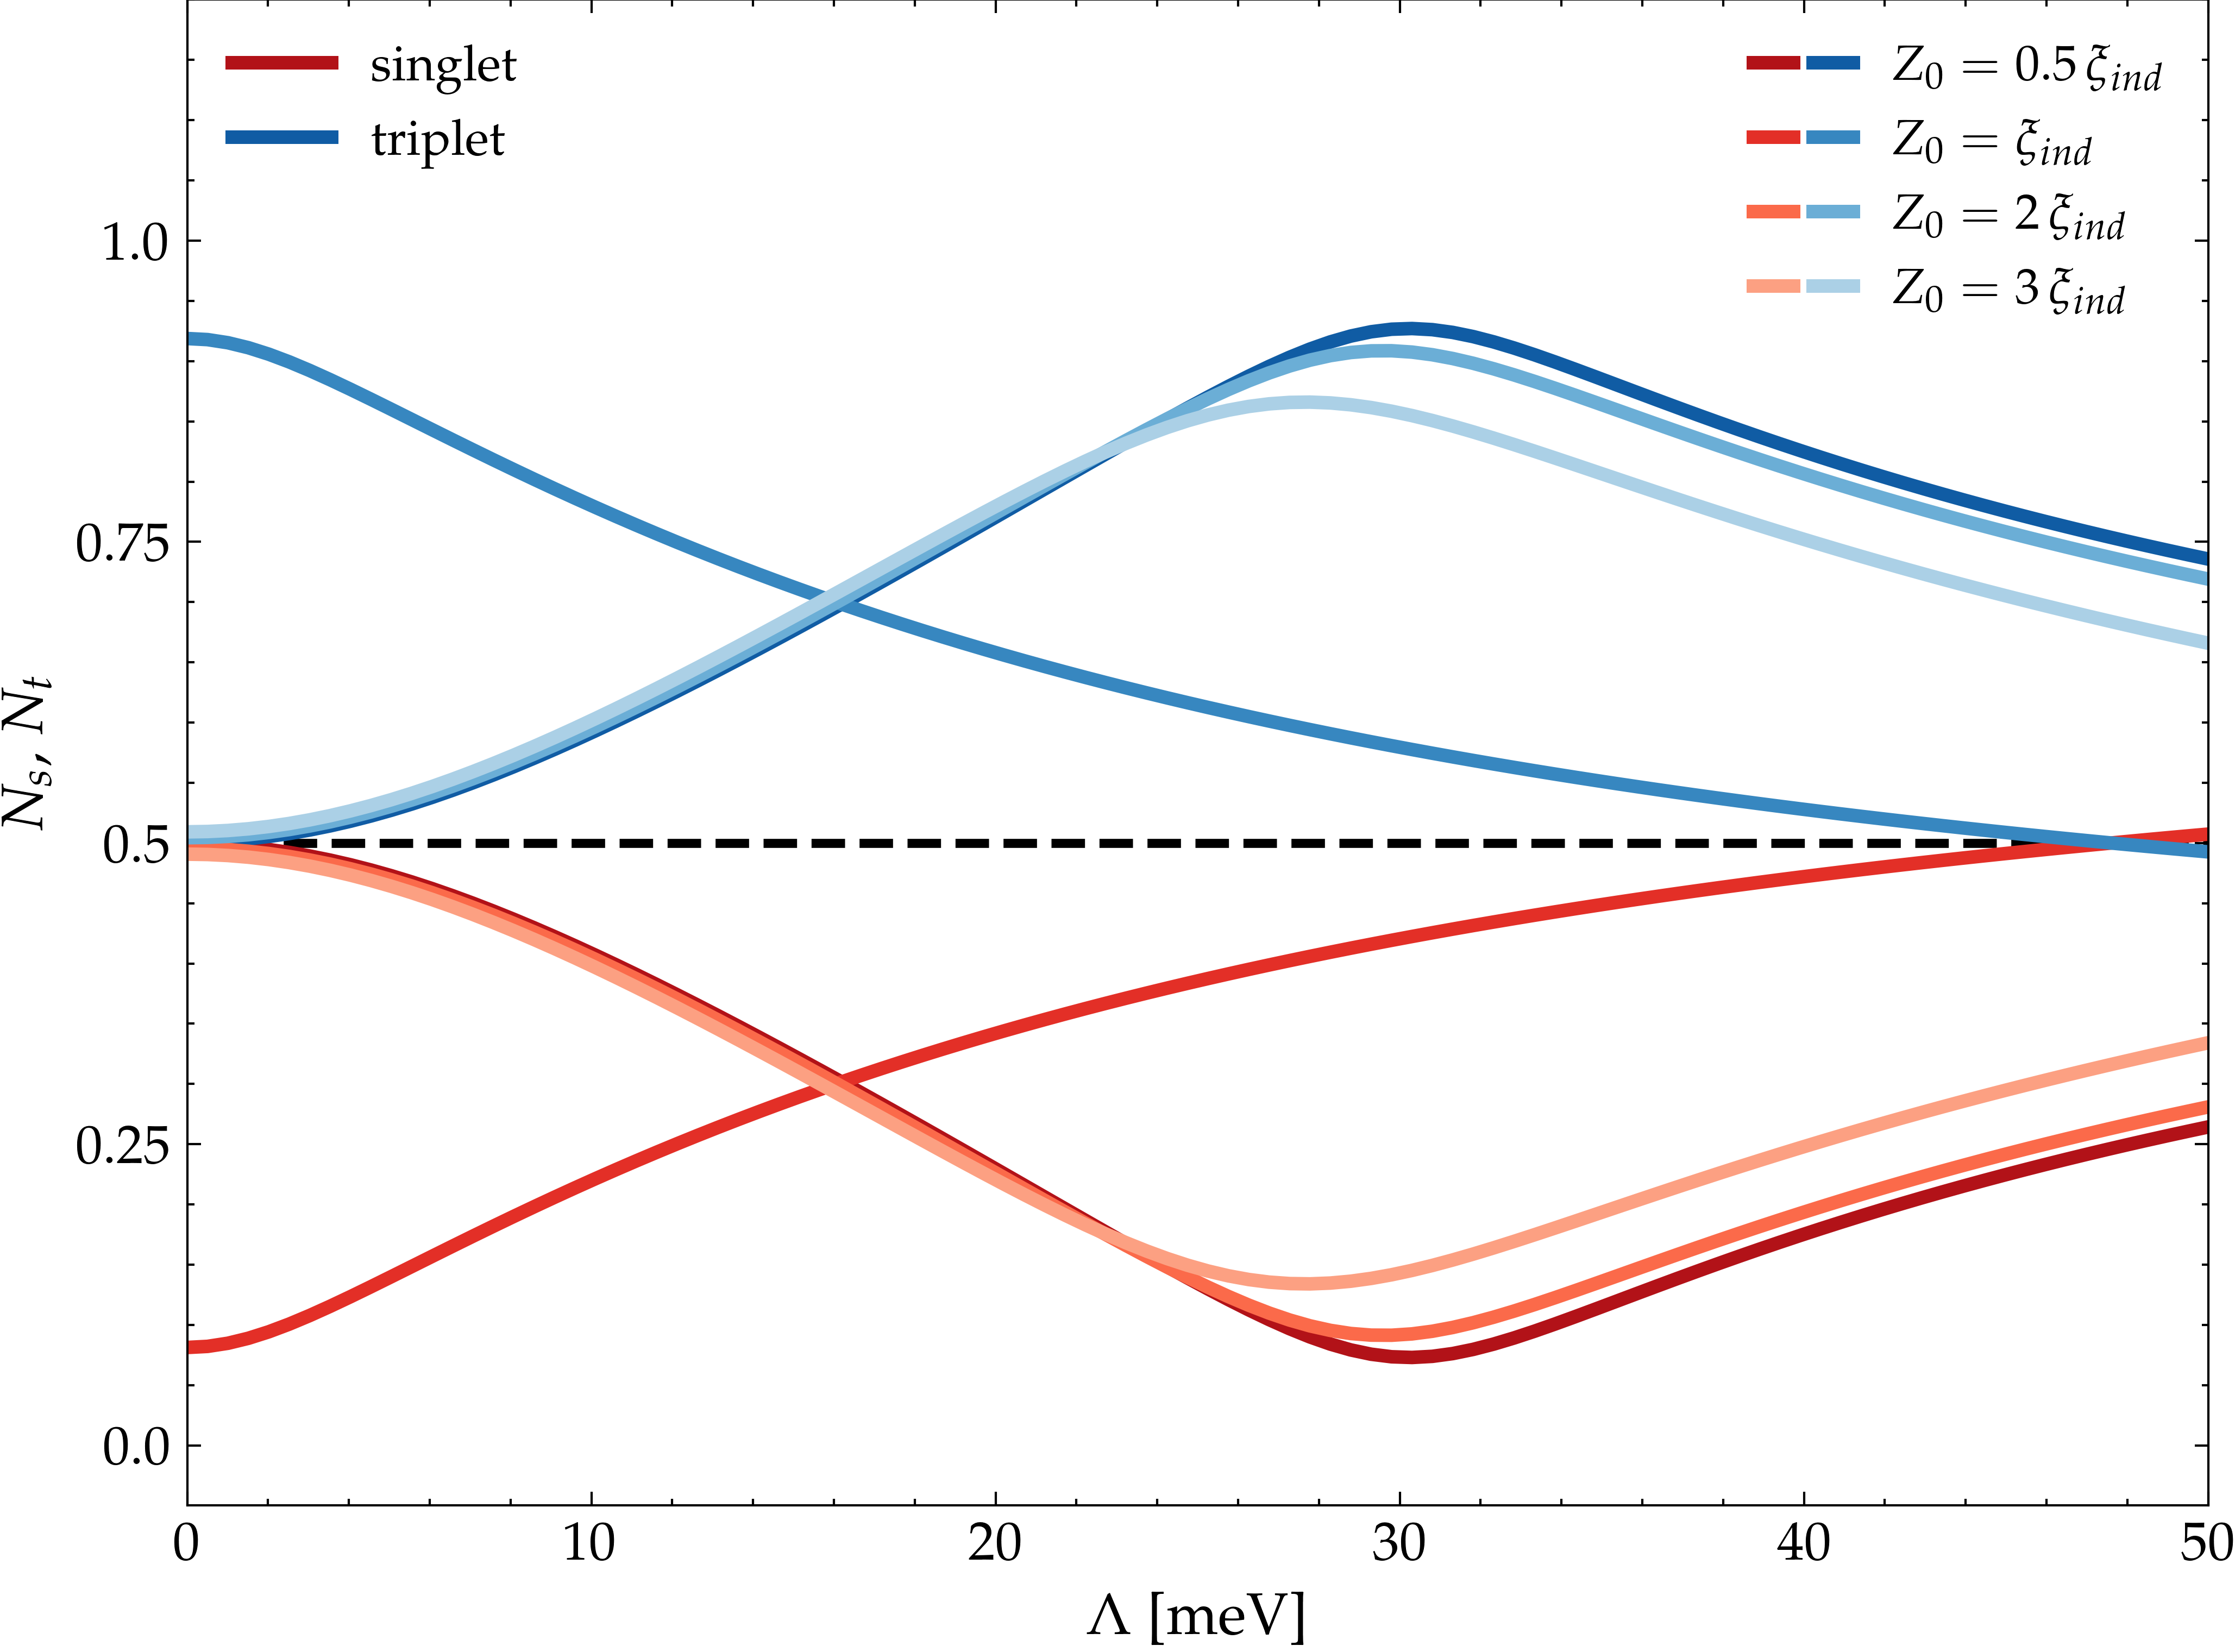

In [120]:
# colors
n = 7; cmap_s = plt.get_cmap('Reds_r', n); cmap_t = plt.get_cmap('Blues_r', n)

# figure
fig, ax = plt.subplots(1,1, figsize=(8, 6))
# plot horizontal line at 0.5
ax.axhline(y=0.5, c='black', ls='--', lw=2)

lines = []; lw = 3
for idx in range(len(CM)):

    if idx == 0: 
        ax.plot(Zeeman, Ns[idx], c=cmap_s(idx+1), lw=lw, label='singlet')
        ax.plot(Zeeman, Nt[idx], c=cmap_t(idx+1), lw=lw, label='triplet')
    else:
        ax.plot(Zeeman, Ns[idx], c=cmap_s(idx+1), lw=lw)
        ax.plot(Zeeman, Nt[idx], c=cmap_t(idx+1), lw=lw)

    # Create a legend entry with both lines
    lines.append((Line2D( [0], [0], color=cmap_s(idx+1), lw=lw ),
                  Line2D( [0], [0], color=cmap_t(idx+1), lw=lw ) ))


# set limits
ax.set_xlim(0., 0.05)
ax.set_ylim(-0.05, 1.2)
# set ticks
ax.set_yticks([0., 0.25, 0.5, 0.75, 1.])
ax.set_xticks([0., 0.010, 0.020, 0.030, 0.040, 0.050])
# set ticks labels
ax.set_xticklabels(['0', '10', '20', '30', '40', '50'], fontsize=12)
ax.set_yticklabels([0., 0.25, 0.5, 0.75, 1.], fontsize=12)

# set labels
ax.set_ylabel("$N_{s}$, $N_{t}$", fontsize = 13)
ax.set_xlabel("$\Lambda$ [meV]", fontsize = 13);

# legend for Center of Mass
legend_CM = ax.legend(lines, ['$Z_0 = 0.5 \, \\xi_{ind}$', '$Z_0 = \\xi_{ind}$', '$Z_0 = 2 \, \\xi_{ind}$', '$Z_0 = 3 \, \\xi_{ind}$'], fontsize=11, handler_map={tuple: HandlerTuple(ndivide=None)})
ax.add_artist(legend_CM)

# legend for even/odd parts
ax.legend(loc='upper left', fontsize=11);

fig.savefig('Paper/spin_symmetry_Bi2Se3.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('Paper/spin_symmetry_Bi2Se3.svg', bbox_inches='tight', pad_inches=0.1)

#### **Momentum Symmetry**